In [1]:
import pandas as pd  # Importa la libreria Pandas
import numpy as np  # Importa la libreria Numpy
import matplotlib.pyplot as plt  # Importa el módulo pyplot de la libreria matplotlib
import seaborn as sns  # Importa la libreria seaborn
from sklearn.linear_model import LinearRegression  # Importa el método LinerarRegression del módulo linear_model de la librería sklearn 
from sklearn.model_selection import train_test_split  # Importa el método tranin_test_split del módulo model_selection de la librería sklearn
from sklearn.metrics import r2_score  # Importa el método r2_score del módulo metrics de la librería sklearn
from sklearn.metrics import mean_squared_error  # Importa el método mean_squared_error del módulo metrics de la librería sklearn
from sklearn.preprocessing import StandardScaler  # Importa el método StandardScaler del módulo preprocessing de la librería sklearn
from sklearn.linear_model import LogisticRegression  # Importa el método LogisticRegression del módulo linear_model de la librería sklearn
from sklearn.metrics import classification_report  # Importa el método classification_report del módulo metrics de la librería sklearn

In [2]:
df = pd.read_csv("ML_cars.csv")  # Carga el dataset ML_cars.csv y construye el DataFrame df
df.head()  # Muestra las primeras cinco observaciones del DataFrame df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.tail()  # Muestra las últimas cinco observaciones del DataFrame df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [4]:
df.info()  # Muestra la información sobre el DataFrame df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Se observa que no hay valores faltantes en el DataFrame

In [5]:
df.columns  # Muestra los nombres de las columnas del DataFrame df

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.dtypes  # Muestra el tipo de datos que hay en cada columna del DataFrame df

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
df.duplicated()  # Detecta si existen datos duplicados en el DataFrame df

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [8]:
df.duplicated().sum()  # Numero de datos duplicados que existen en el DataFrame df

0

In [9]:
df.describe()  # Muestra la información estadística de las columnas numéricas del DataFrame df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Aquí de la información correspondiente a la columna car_ID, que es el Número de Identificación del Vehículo, solo nos interesa la cantidad (count), porque para esta variable el nivel de medición es nominal. Para la columna symboling, que es la Calificación de riesgo asociada al vehículo, no nos interesa ni la media (mean), ni la desviación estándar (std), ya que para esta variable el nivel de medición es ordinal.

In [10]:
df['CarName'].unique()  # Valores únicos de la columna CarName, Nombre de fantasía del vehículo

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [11]:
df['CarName'].nunique()  # Número de valores únicos de la columna CarName, Nombre de fantasía del vehículo

147

In [12]:
df['CarName'].value_counts()  # Número de vehículos por cada Nombre de fantasía

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [13]:
df['symboling'].unique()  # Valores únicos de la columna symboling, Calificación de riesgo asociada al vehículo. 
                          # Escala: 3 para vehículo poco seguro, ..., -3 para vehículo muy seguro. 

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [14]:
df['symboling'].nunique()  # Número de valores únicos de la columna symboling

6

In [15]:
df['symboling'].value_counts()  # Número de vehículos por cada calificación de riesgo

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

Se observa que la mayoría de los vehículos tienen una calificación de riesgo neutra: ni seguros ni inseguros, seguidos por la escala de los vehículos no seguros, quedando con menor cantidad la escala de los vehículos seguros.

In [16]:
pd.crosstab(df['CarName'], df['symboling'], margins=True)  # Número de vehículos clasificados por symboling y CarName
                                                           # symboling es Calificación de riesgo asociada al vehículo
                                                           # CarName es el Nombre de fantasía del vehículo

symboling,-2,-1,0,1,2,3,All
CarName,,,,,,,
Nissan versa,0,0,0,1,0,0,1
alfa-romero Quadrifoglio,0,0,0,1,0,0,1
alfa-romero giulia,0,0,0,0,0,1,1
alfa-romero stelvio,0,0,0,0,0,1,1
audi 100 ls,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
volvo 264gl,1,1,0,0,0,0,2
volvo diesel,0,1,0,0,0,0,1
vw dasher,0,0,0,0,0,1,1


In [17]:
pd.crosstab(df['fueltype'], df['aspiration'], margins=True)  # Número de vehículos clasificados por aspiration y fueltype
                                                             # aspiration es el Tipo de aspiración del motor del vehículo
                                                             # fueltype es el Tipo de combustible que usa el vehículo

aspiration,std,turbo,All
fueltype,,,
diesel,7,13,20
gas,161,24,185
All,168,37,205


In [18]:
df.pivot_table('price', index='fueltype', columns='aspiration')  # Precio promedio de vehículos clasificados por aspiration y fueltype

aspiration,std,turbo
fueltype,,
diesel,9670.571429,19159.153846
gas,12739.127329,14748.465292


In [19]:
pd.crosstab(df['doornumber'], df['carbody'], margins=True)  # Número de vehículos clasificados por carbody y doornumber
                                                            # carbody es el Tipo de carrocería del vehículo
                                                            # doornumber es el Número de puertas del vehículo

carbody,convertible,hardtop,hatchback,sedan,wagon,All
doornumber,,,,,,
four,0,0,10,80,25,115
two,6,8,60,16,0,90
All,6,8,70,96,25,205


In [20]:
df.pivot_table('price', index='doornumber', columns='carbody')  # Precio promedio de vehículos clasificados por carbody y doornumber

carbody,convertible,hardtop,hatchback,sedan,wagon
doornumber,,,,,
four,NaN,NaN,8372.000000,14495.16875,12371.96
two,21890.5,22208.5,10710.761117,13589.78125,NaN


In [21]:
pd.crosstab(df['enginelocation'], df['drivewheel'], margins=True)  # Número de vehículos clasificados por drivewheel y enginelocation
                                                                   # drivewheel es la Ubicación del volante del conductor en el vehículo
                                                                   # enginelocation es la Ubicación del motor en el vehículo

drivewheel,4wd,fwd,rwd,All
enginelocation,,,,
front,9,120,73,202
rear,0,0,3,3
All,9,120,76,205


In [22]:
df.pivot_table('price', index='enginelocation', columns='drivewheel')  # Precio promedio de vehículos clasificados por drivewheel y enginelocation

drivewheel,4wd,fwd,rwd
enginelocation,,,
front,11087.463,9239.308333,19310.10274
rear,NaN,NaN,34528.00000


In [23]:
pd.crosstab(df['cylindernumber'], df['enginetype'], margins=True)  # Número de vehículos clasificados por enginetype y cylindernumber
                                                                   # enginetype es el Tipo de motor del vehículo
                                                                   # cylindernumber es el Número de cilindros del motor del vehículo

enginetype,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,All
cylindernumber,,,,,,,,
eight,0,1,0,0,0,4,0,5
five,0,0,0,11,0,0,0,11
four,6,0,11,130,12,0,0,159
six,6,0,0,7,3,8,0,24
three,0,0,1,0,0,0,0,1
twelve,0,0,0,0,0,1,0,1
two,0,0,0,0,0,0,4,4
All,12,1,12,148,15,13,4,205


In [24]:
df.pivot_table('price', index='cylindernumber', columns='enginetype')  # Precio promedio de vehículos clasificados por enginetype y cylindernumber

enginetype,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
cylindernumber,,,,,,,
eight,NaN,31400.5,NaN,NaN,NaN,38900.000,NaN
five,NaN,NaN,NaN,21630.469727,NaN,NaN,NaN
four,14266.833333,NaN,15489.090909,9822.761538,8541.25,NaN,NaN
six,21966.000000,NaN,NaN,28295.000000,34528.00,16834.875,NaN
three,NaN,NaN,5151.000000,NaN,NaN,NaN,NaN
twelve,NaN,NaN,NaN,NaN,NaN,36000.000,NaN
two,NaN,NaN,NaN,NaN,NaN,NaN,13020.0


In [25]:
pd.crosstab([df['cylindernumber'], df['enginetype']], df['fuelsystem'], margins=True)  # Número de vehículos clasificados por fuelsystem y por cylindernumber y enginetype
                                                                                       # fuelsystem es el Sistema de administración de combustible del motor del vehículo
                                                                                       # cylindernumber es el Número de cilindros del motor del vehículo
                                                                                       # enginetype es el Tipo de motor del vehículo

fuelsystem                 1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  All
cylindernumber enginetype                                                   
eight          dohcv          0     0     0    0    0     1     0     0    1
               ohcv           0     0     0    0    0     4     0     0    4
five           ohc            0     0     0    4    0     7     0     0   11
four           dohc           0     0     0    0    0     6     0     0    6
               l              0     0     0    5    0     6     0     0   11
               ohc           11    57     0   10    1    41     9     1  130
               ohcf           0     8     0    0    0     4     0     0   12
six            dohc           0     0     0    0    0     6     0     0    6
               ohc            0     0     0    1    0     6     0     0    7
               ohcf           0     0     0    0    0     3     0     0    3
               ohcv           0     0     0    0    0     8     0     0    8
three          l              0     1     0    0    0     0     0     0    1
twelve         ohcv           0     0     0    0    0     1     0     0    1
two            rotor          0     0     3    0    0     1     0     0    4
All                          11    66     3   20    1    94     9     1  205

In [26]:
df.pivot_table('price', index=['cylindernumber', 'enginetype'], columns='fuelsystem')  # Precio promedio de vehículos clasificados por fuelsystem y por cylindernumber y enginetype

fuelsystem                        1bbl         2bbl     4bbl      idi  \
cylindernumber enginetype                                               
eight          dohcv               NaN          NaN      NaN      NaN   
               ohcv                NaN          NaN      NaN      NaN   
five           ohc                 NaN          NaN      NaN  28394.0   
four           dohc                NaN          NaN      NaN      NaN   
               l                   NaN          NaN      NaN  15797.0   
               ohc         7555.545455  7526.719298      NaN  10173.2   
               ohcf                NaN  7423.000000      NaN      NaN   
six            dohc                NaN          NaN      NaN      NaN   
               ohc                 NaN          NaN      NaN  22470.0   
               ohcf                NaN          NaN      NaN      NaN   
               ohcv                NaN          NaN      NaN      NaN   
three          l                   NaN  5151.000000      NaN      NaN   
twelve         ohcv                NaN          NaN      NaN      NaN   
two            rotor               NaN          NaN  12145.0      NaN   

fuelsystem                     mfi          mpfi          spdi     spfi  
cylindernumber enginetype                                                
eight          dohcv           NaN  31400.500000           NaN      NaN  
               ohcv            NaN  38900.000000           NaN      NaN  
five           ohc             NaN  17765.595286           NaN      NaN  
four           dohc            NaN  14266.833333           NaN      NaN  
               l               NaN  15232.500000           NaN      NaN  
               ohc         12964.0  13174.804878  10990.444444  11048.0  
               ohcf            NaN  10777.750000           NaN      NaN  
six            dohc            NaN  21966.000000           NaN      NaN  
               ohc             NaN  29265.833333           NaN      NaN  
               ohcf            NaN  34528.000000           NaN      NaN  
               ohcv            NaN  16834.875000           NaN      NaN  
three          l               NaN           NaN           NaN      NaN  
twelve         ohcv            NaN  36000.000000           NaN      NaN  
two            rotor           NaN  15645.000000           NaN      NaN

In [27]:
# DataFrame para las variables numéricas
df_vn = df[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]

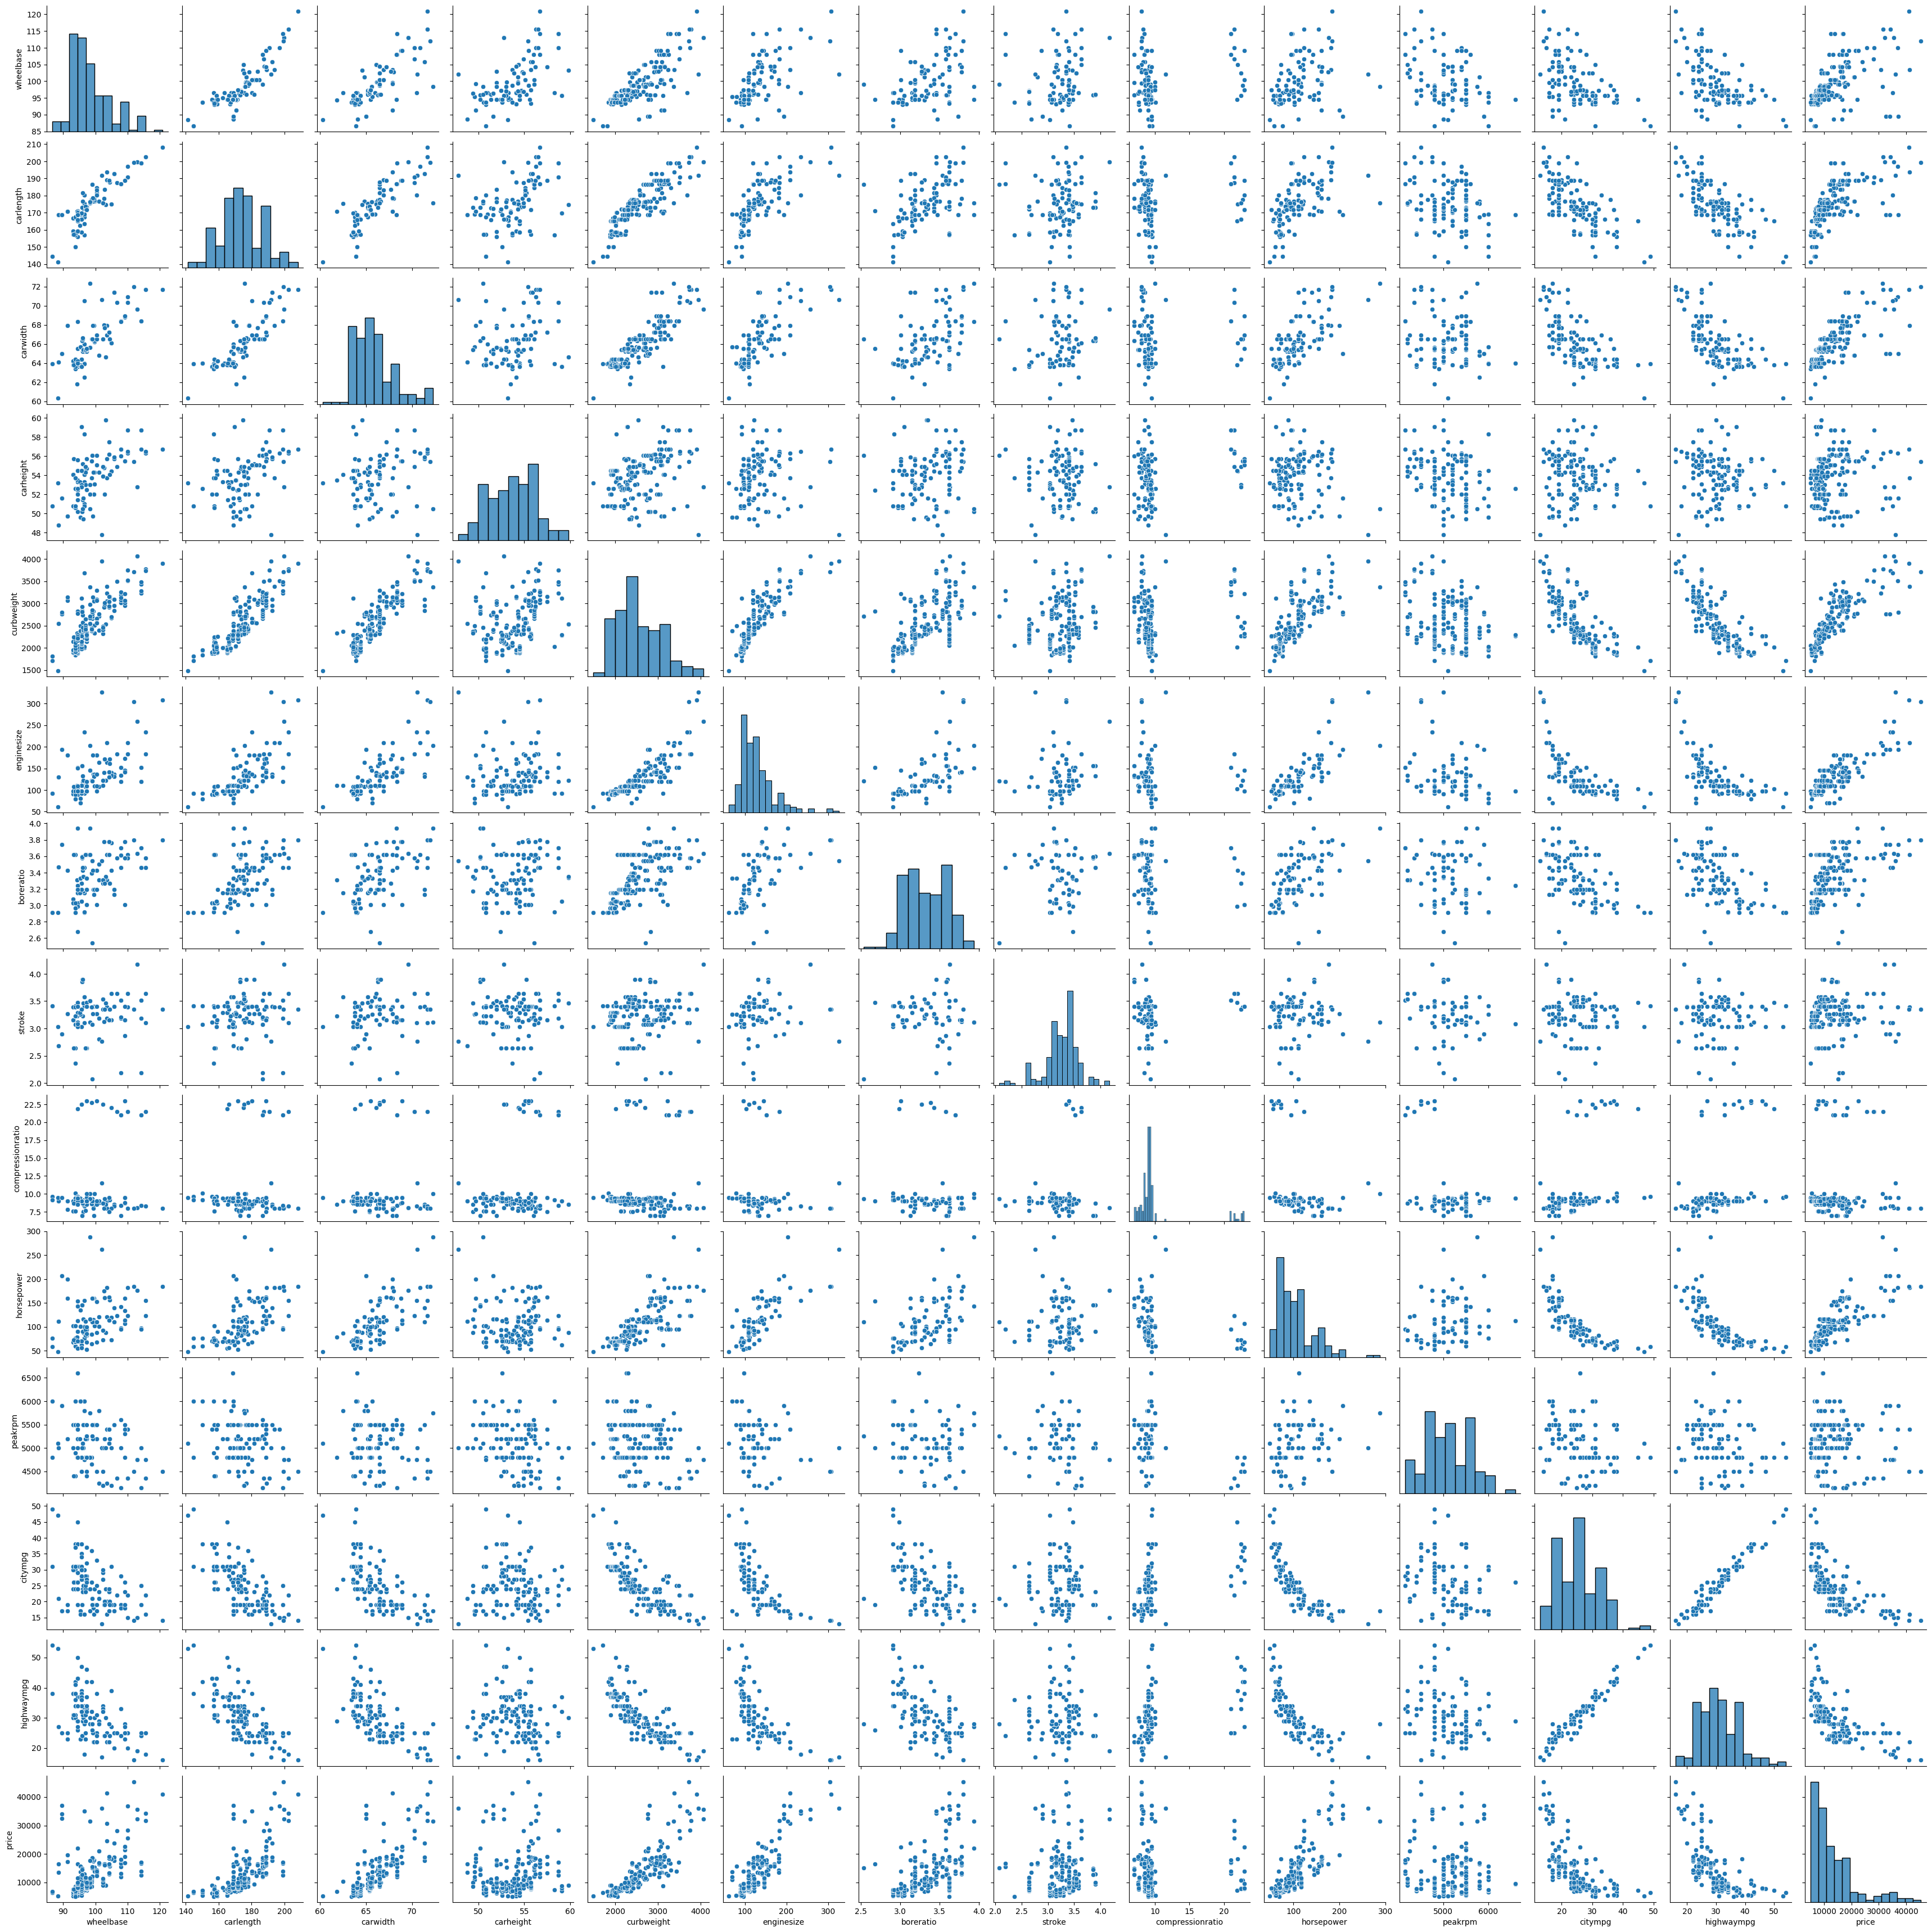

In [28]:
sns.pairplot(df_vn)  # Muestra un pairplot para las variables numéricas del dataframe

In [29]:
mat_corr = df_vn.corr()  # Matriz de correlación para las variables numéricas
mat_corr

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


In [30]:
def plot_corre_heatmap(m_corr):
    '''
    Función que grafica un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(m_corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

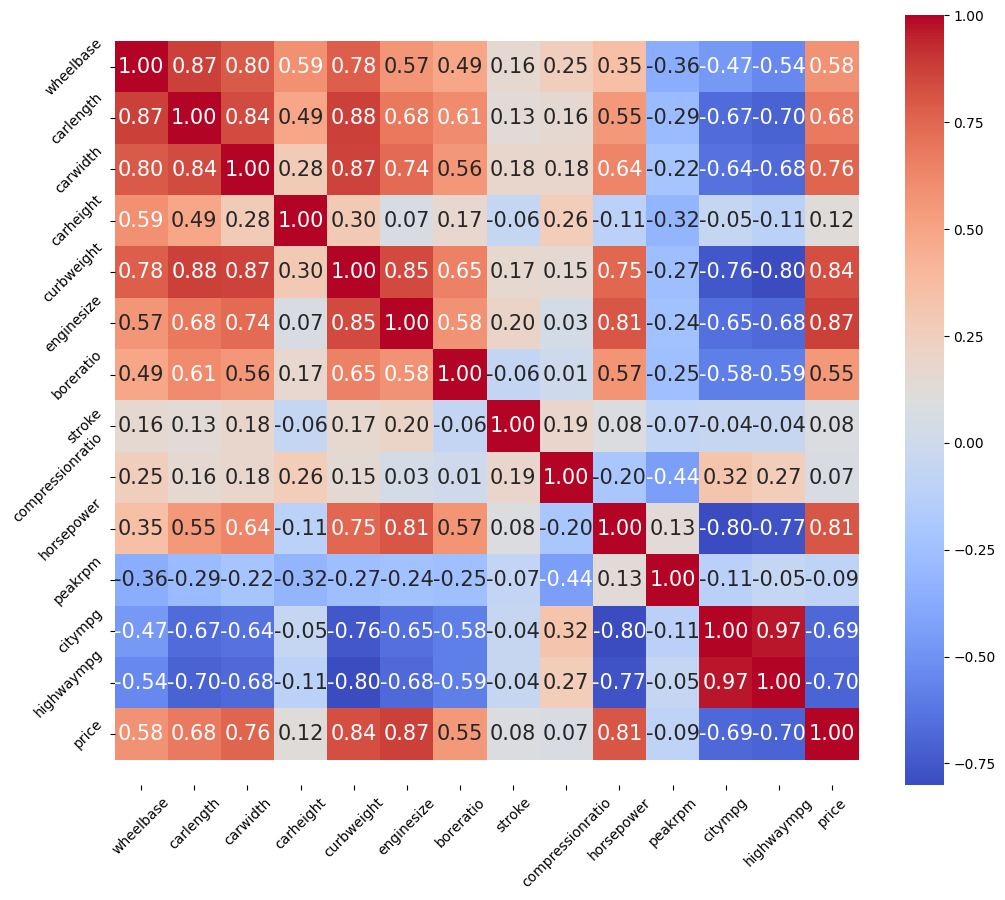

In [31]:
plot_corre_heatmap(mat_corr)

Se observa que las variables: carheight (Altura del vehículo), stroke (Volumen de cilindrada), compressionratio (Relación de comprensión del aire dentro del motor) y peakrpm (Revoluciones máximas que soporta el motor), no están correlacionadas con el precio de los vehículos, por ello no serán consideradas en este estudio;

que las variables: wheelbase (Distancia entre ejes) y boreratio (Relación diámetro/carrera de los pistones del motor), correlacionan moderadamente con el precio de los vehículos;

que las variables: carlength (Longitud del vehículo), carwidth (Ancho del vehículo), citympg (Consumo en ciudad en millas por galón de combustible) y highwaympg (Consumo en ruta en millas por galón de combustible) están altamente correlacionadas con el precio de los vehículos, carlength y carwidth de manera directamente proporcional, mientras que citympg y highwaympg de manera inversamente proporcional;

y que las variables: curbweight (Peso del vehículo sin carga ni ocupantes), enginesize (Tamaño del motor) y horsepower (Potencia del vehículo en caballos de fuerza) están muy altamente correlacionadas con el precio de los vehículos.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2548\384936717.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['wheelbase'], hist=True)  # Muestra la forma de la distribución de la variable wheelbase, Distancia entre ejes


<Axes: xlabel='wheelbase', ylabel='Density'>

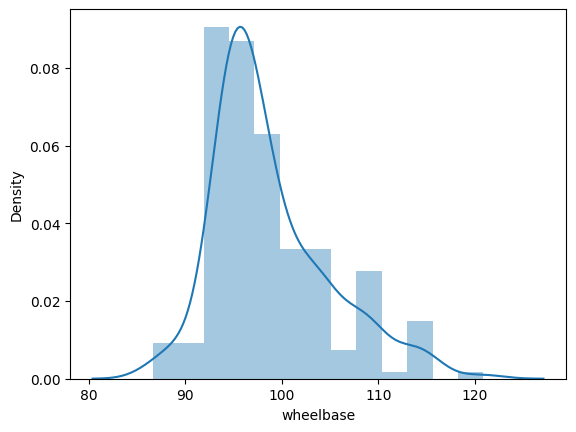

In [32]:
sns.distplot(df['wheelbase'], hist=True)  # Muestra la forma de la distribución de la variable wheelbase, Distancia entre ejes

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2548\1177997483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carlength'], hist=True)  # Muestra la forma de la distribución de la variable carlength, Longitud del vehículo


<Axes: xlabel='carlength', ylabel='Density'>

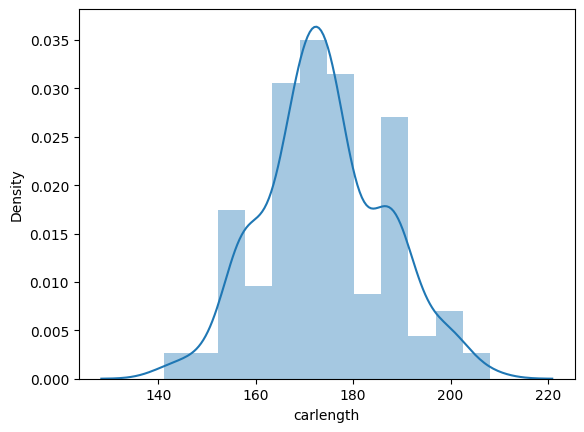

In [33]:
sns.distplot(df['carlength'], hist=True)  # Muestra la forma de la distribución de la variable carlength, Longitud del vehículo

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2548\1450434168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carwidth'], hist=True)  # Muestra la forma de la distribución de la variable carwidth, Ancho del vehículo


<Axes: xlabel='carwidth', ylabel='Density'>

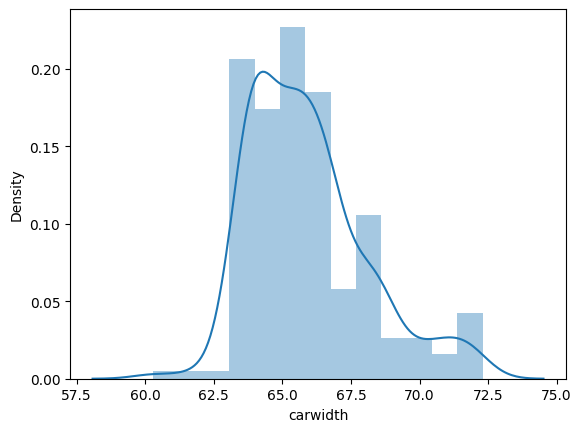

In [34]:
sns.distplot(df['carwidth'], hist=True)  # Muestra la forma de la distribución de la variable carwidth, Ancho del vehículo

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2548\3963926600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['curbweight'], hist=True)  # Muestra la forma de la distribución de la variable curbweight, Peso del vehículo sin carga ni ocupantes


<Axes: xlabel='curbweight', ylabel='Density'>

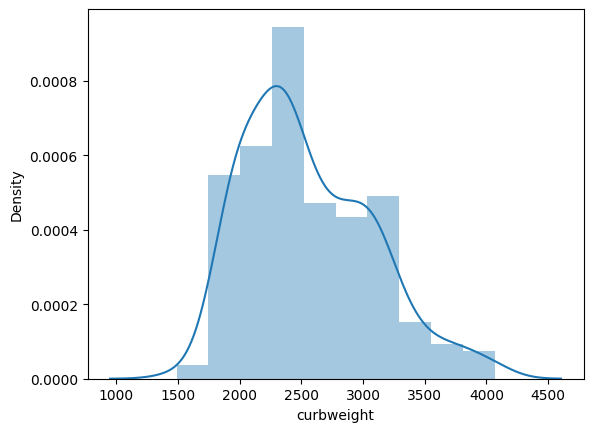

In [35]:
sns.distplot(df['curbweight'], hist=True)  # Muestra la forma de la distribución de la variable curbweight, Peso del vehículo sin carga ni ocupantes

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2548\2924961559.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['enginesize'], hist=True)  # Muestra la forma de la distribución de la variable enginesize, Tamaño del motor


<Axes: xlabel='enginesize', ylabel='Density'>

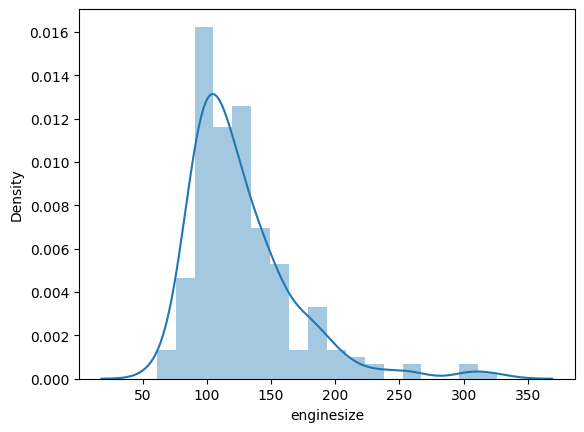

In [36]:
sns.distplot(df['enginesize'], hist=True)  # Muestra la forma de la distribución de la variable enginesize, Tamaño del motor

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2548\1201958313.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['boreratio'], hist=True)  # Muestra la forma de la distribución de la variable boreratio, Relación diámetro/carrera de los pistones del motor


<Axes: xlabel='boreratio', ylabel='Density'>

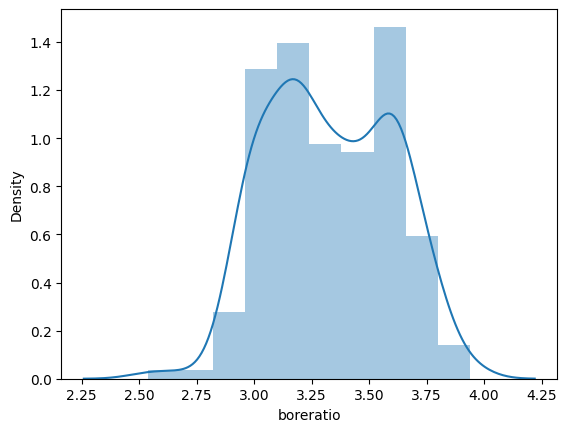

In [37]:
sns.distplot(df['boreratio'], hist=True)  # Muestra la forma de la distribución de la variable boreratio, Relación diámetro/carrera de los pistones del motor

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2548\3926869832.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['horsepower'], hist=True)  # Muestra la forma de la distribución de la variable horsepower, Potencia del vehículo en caballos de fuerza (HP)


<Axes: xlabel='horsepower', ylabel='Density'>

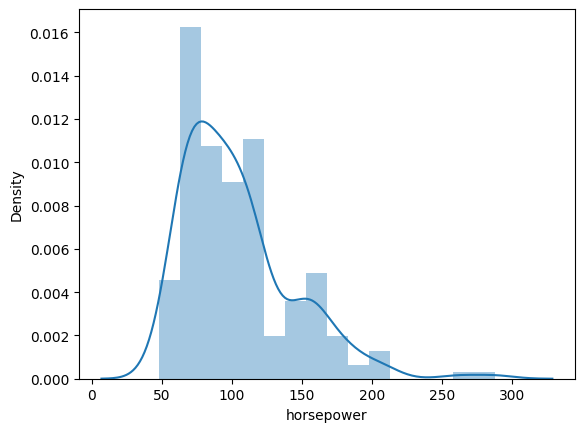

In [38]:
sns.distplot(df['horsepower'], hist=True)  # Muestra la forma de la distribución de la variable horsepower, Potencia del vehículo en caballos de fuerza (HP)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2548\1448694614.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['citympg'], hist=True)  # Muestra la forma de la distribución de la variable citympg, Consumo en ciudad en millas por galón de combustible


<Axes: xlabel='citympg', ylabel='Density'>

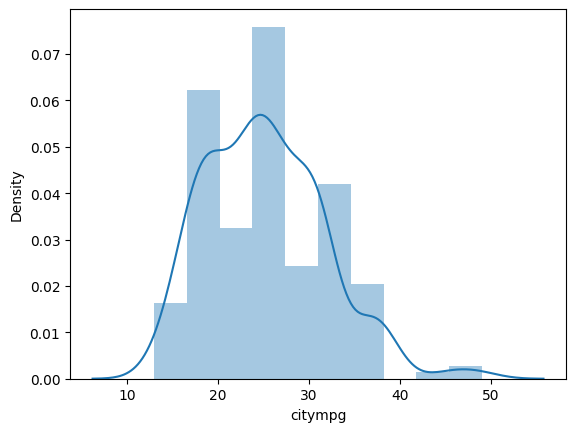

In [39]:
sns.distplot(df['citympg'], hist=True)  # Muestra la forma de la distribución de la variable citympg, Consumo en ciudad en millas por galón de combustible

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2548\2979240788.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['highwaympg'], hist=True)  # Muestra la forma de la distribución de la variable highwaympg, Consumo en ruta en millas por galón de combustible


<Axes: xlabel='highwaympg', ylabel='Density'>

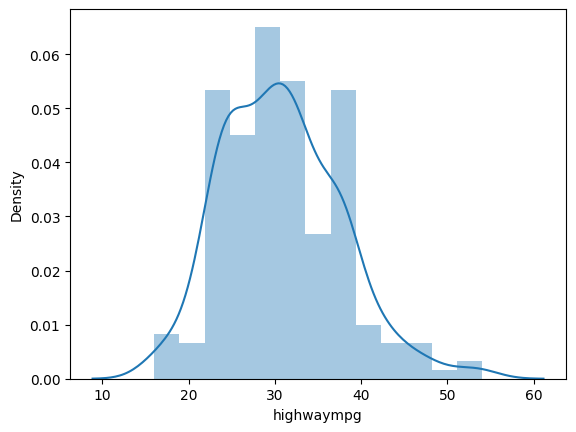

In [40]:
sns.distplot(df['highwaympg'], hist=True)  # Muestra la forma de la distribución de la variable highwaympg, Consumo en ruta en millas por galón de combustible

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2548\2520370343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], hist=True)  # Muestra la forma de la distribución de la variable price, Precio del vehículo


<Axes: xlabel='price', ylabel='Density'>

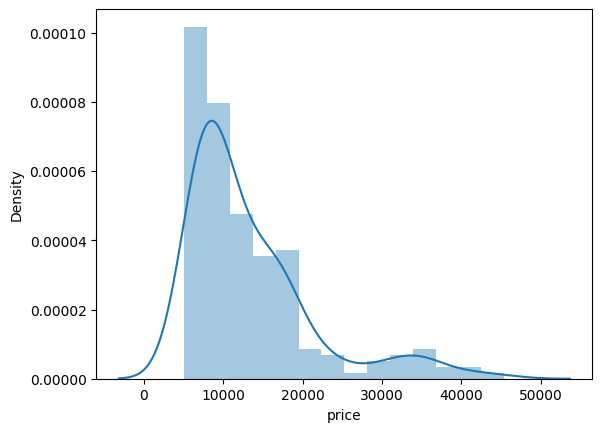

In [41]:
sns.distplot(df['price'], hist=True)  # Muestra la forma de la distribución de la variable price, Precio del vehículo

{'whiskers': [<matplotlib.lines.Line2D at 0x242d2c35510>,
 'caps': [<matplotlib.lines.Line2D at 0x242d2c36c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x242d2c34b10>],
 'medians': [<matplotlib.lines.Line2D at 0x242d2c3c310>],
 'fliers': [<matplotlib.lines.Line2D at 0x242d2bf2c10>],
 'means': []}

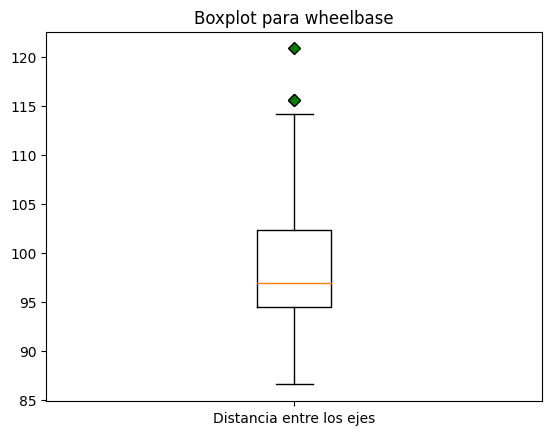

In [42]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para wheelbase')
ax.boxplot(df['wheelbase'], flierprops=green_diamond, labels=["Distancia entre los ejes"])

{'whiskers': [<matplotlib.lines.Line2D at 0x242d2c9f5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x242d2ca8dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x242d2c9eb50>],
 'medians': [<matplotlib.lines.Line2D at 0x242d2caa390>],
 'fliers': [<matplotlib.lines.Line2D at 0x242d2caad50>],
 'means': []}

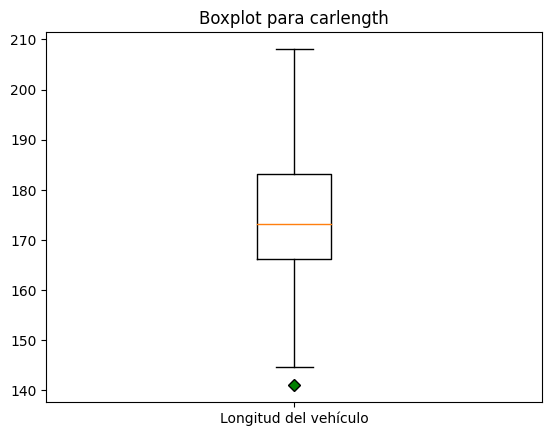

In [43]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para carlength')
ax.boxplot(df['carlength'], flierprops=green_diamond, labels=["Longitud del vehículo"])

{'whiskers': [<matplotlib.lines.Line2D at 0x242d2cde490>,
 'caps': [<matplotlib.lines.Line2D at 0x242d2d077d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x242d2d05890>],
 'medians': [<matplotlib.lines.Line2D at 0x242d2d10d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x242d2c0ef50>],
 'means': []}

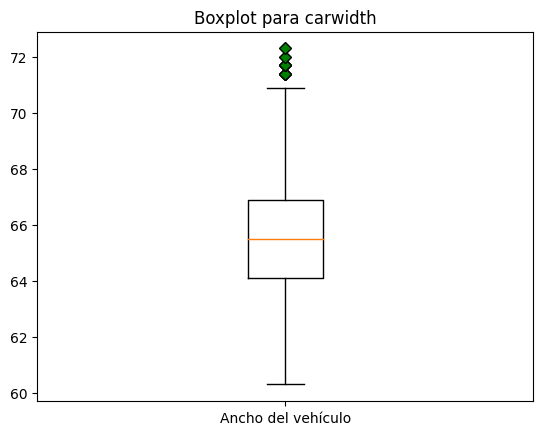

In [44]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para carwidth')
ax.boxplot(df['carwidth'], flierprops=green_diamond, labels=["Ancho del vehículo"])

{'whiskers': [<matplotlib.lines.Line2D at 0x242d2d6e9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x242d0709190>,
 'boxes': [<matplotlib.lines.Line2D at 0x242d2d6e150>],
 'medians': [<matplotlib.lines.Line2D at 0x242d2d7d510>],
 'fliers': [<matplotlib.lines.Line2D at 0x242d2d273d0>],
 'means': []}

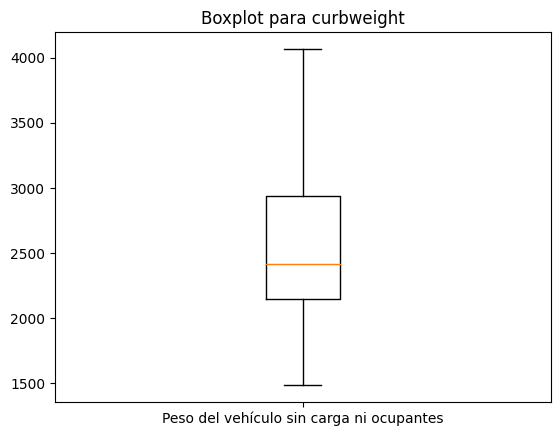

In [45]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para curbweight')
ax.boxplot(df['curbweight'], flierprops=green_diamond, labels=["Peso del vehículo sin carga ni ocupantes"])

{'whiskers': [<matplotlib.lines.Line2D at 0x242d2dcd6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x242d2de3250>,
 'boxes': [<matplotlib.lines.Line2D at 0x242d2de14d0>],
 'medians': [<matplotlib.lines.Line2D at 0x242d2df06d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x242d2b6d050>],
 'means': []}

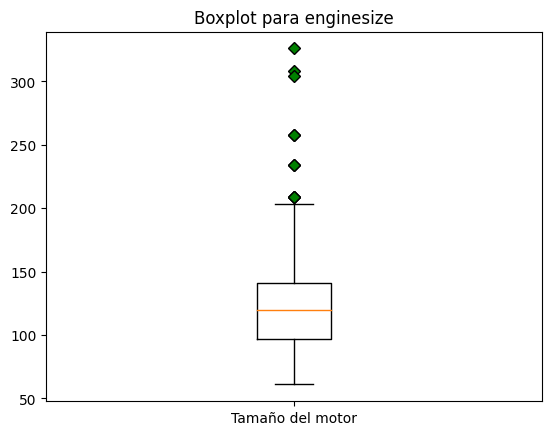

In [46]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para enginesize')
ax.boxplot(df['enginesize'], flierprops=green_diamond, labels=["Tamaño del motor"])

{'whiskers': [<matplotlib.lines.Line2D at 0x242d3f18050>,
 'caps': [<matplotlib.lines.Line2D at 0x242d3f1a310>,
 'boxes': [<matplotlib.lines.Line2D at 0x242d2e28790>],
 'medians': [<matplotlib.lines.Line2D at 0x242d3f1b8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x242d2e22c90>],
 'means': []}

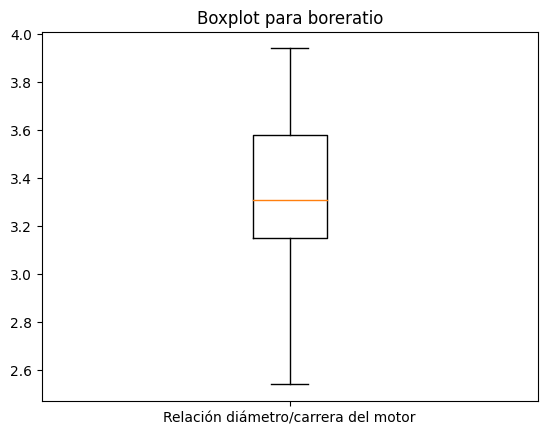

In [47]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para boreratio')
ax.boxplot(df['boreratio'], flierprops=green_diamond, labels=["Relación diámetro/carrera del motor"])

{'whiskers': [<matplotlib.lines.Line2D at 0x242d3f77150>,
 'caps': [<matplotlib.lines.Line2D at 0x242d3f4be50>,
 'boxes': [<matplotlib.lines.Line2D at 0x242d3f49790>],
 'medians': [<matplotlib.lines.Line2D at 0x242d3f89f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x242d3f77cd0>],
 'means': []}

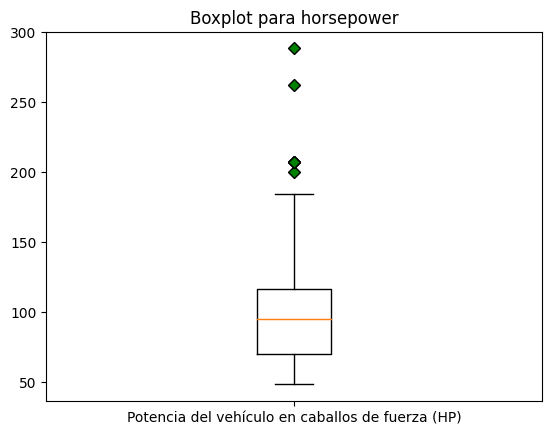

In [48]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para horsepower')
ax.boxplot(df['horsepower'], flierprops=green_diamond, labels=["Potencia del vehículo en caballos de fuerza (HP)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x242d3fec310>,
 'caps': [<matplotlib.lines.Line2D at 0x242d3fedb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x242d3fe38d0>],
 'medians': [<matplotlib.lines.Line2D at 0x242d3fef010>],
 'fliers': [<matplotlib.lines.Line2D at 0x242d3fed590>],
 'means': []}

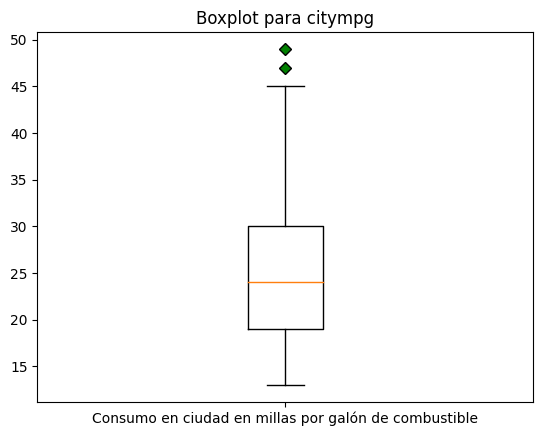

In [49]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para citympg')
ax.boxplot(df['citympg'], flierprops=green_diamond, labels=["Consumo en ciudad en millas por galón de combustible"])

{'whiskers': [<matplotlib.lines.Line2D at 0x242d4183010>,
 'caps': [<matplotlib.lines.Line2D at 0x242d418c950>,
 'boxes': [<matplotlib.lines.Line2D at 0x242d4151790>],
 'medians': [<matplotlib.lines.Line2D at 0x242d418ded0>],
 'fliers': [<matplotlib.lines.Line2D at 0x242d418c650>],
 'means': []}

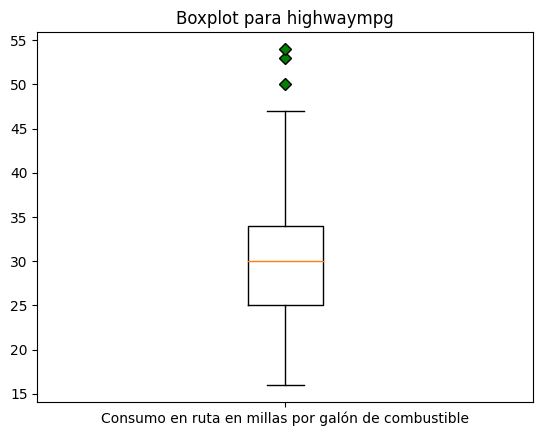

In [50]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para highwaympg')
ax.boxplot(df['highwaympg'], flierprops=green_diamond, labels=["Consumo en ruta en millas por galón de combustible"])

{'whiskers': [<matplotlib.lines.Line2D at 0x242d41f6a50>,
 'caps': [<matplotlib.lines.Line2D at 0x242d4208110>,
 'boxes': [<matplotlib.lines.Line2D at 0x242d41e6c10>],
 'medians': [<matplotlib.lines.Line2D at 0x242d42096d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x242d41e7f50>],
 'means': []}

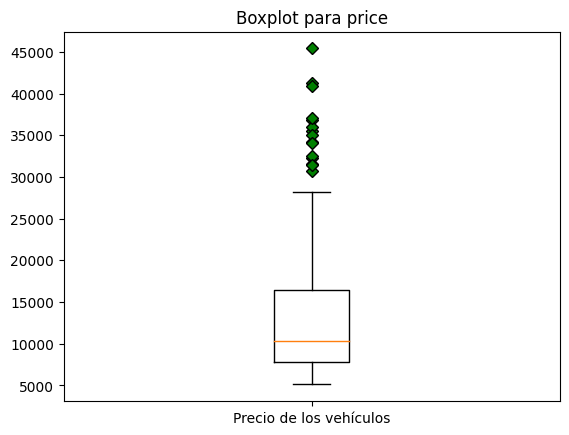

In [51]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para price')
ax.boxplot(df['price'], flierprops=green_diamond, labels=["Precio de los vehículos"])

Se observa que la mayoría de las distribuciones son ligeramente asimétricas positivas con escasos valores atípicos, siendo el tamaño del motor, la potencia del vehículo y el precio del vehículo las distribuciones con una asimétría positiva más marcada y con un mayor número de valores atípicos pero que tampoco son muy numerosos

In [52]:
# Implementar un modelo de regresión con aprendizaje supervisado que permita predecir el precio final de los vehículos

X = df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']]
y = df['price']

In [53]:
# Separa nuestros datos en dos conjunto o grupos: entrenamiento y test. X se denota con mayúscula ya que incluye nueve variables independientes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Imprime la dimensión de los conjuntos de datos de entrenamiento y prueba: X_train, y_train, X_test, y_test
print('Dimensión de los conjuntos de datos de entrenamiento y prueba: ')
print('X_train: ', X_train.shape, '     y_train: ', y_train.shape, '     X_test: ', X_test.shape, '     y_test: ', y_test.shape)

Dimensión de los conjuntos de datos de entrenamiento y prueba: 
X_train:  (143, 9)      y_train:  (143,)      X_test:  (62, 9)      y_test:  (62,)


In [54]:
linear_model = LinearRegression()  # Crea o instancia el Modelo de Regresión Lineal Múltiple

linear_model.fit(X_train, y_train)  # Entrena el Modelo de Regresión Lineal Múltiple

LinearRegression()

In [55]:
# Obtiene las pendientes del modelo de regresión lineal una para cada variable independiente
print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
print()
# Obtiene la ordenada en el origen del modelo de regresión lineal 
print('La ordenada en el origen del modelo de regresión lineal es:', linear_model.intercept_)

Las pendientes del modelo de regresión lineal son: [  23.89415944  -34.81717019  818.79040843    1.57822186   82.87730001
 -793.1150711    40.86542593  -34.77692291  -77.09855649]

La ordenada en el origen del modelo de regresión lineal es: -49978.071532564885


La ecuación de regresión lineal múltiple de precio de los vehículos sobre X1, X2, X3, X4, X5, X6, X7, X8, X9 es:

Y_pred = -49978.071532564885 + 23.89415944 X1 - 34.81717019 X2 + 818.79040843 X3 + 1.57822186 X4 + 82.87730001 X5 - 793.1150711 X6 +   40.86542593 X7 - 34.77692291 X8 - 77.09855649 X9

In [56]:
# Evaluación de la performance del modelo

y_train_pred = linear_model.predict(X_train)  # Realiza las predicciones en el conjunto de entrenamiento
y_test_pred = linear_model.predict(X_test)  # Realiza las predicciones en el conjunto de prueba

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))  # Calcula la raíz del error cuadrático medio en el conjunto de entrenamiento
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))  # Calcula la raíz del error cuadrático medio en el conjunto de prueba
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

r2 = r2_score(y_train, y_train_pred)  # Calcula el coeficiente de determinación en el conjunto de entrenamiento
print('El coeficiente de determinación del regresor en Train es:', r2)

r2 = r2_score(y_test, y_test_pred)  # Calcula el coeficiente de determinación en el conjunto de prueba
print('El coeficiente de determinación del regresor en Test es:', r2)

Raíz del error cuadrático medio en Train: 3098.0715286284794
Raíz del error cuadrático medio en Test: 4035.2358199829446
El coeficiente de determinación del regresor en Train es: 0.84252489773979
El coeficiente de determinación del regresor en Test es: 0.7649812490311773


Se observa que este modelo es aceptable, ya que tiene un coeficiente de determinación alto, un 76.5% de la variación promedio en las predicciones está explicada por la variación en las variables consideradas en el modelo

In [57]:
X_train  # Variables independientes para el conjunto de entrenamiento

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
177,102.4,175.6,66.5,2458,122,3.31,92,27,32
75,102.7,178.4,68.0,2910,140,3.78,175,19,24
174,102.4,175.6,66.5,2480,110,3.27,73,30,33
31,86.6,144.6,63.9,1819,92,2.91,76,31,38
12,101.2,176.8,64.8,2710,164,3.31,121,21,28
...,...,...,...,...,...,...,...,...,...
106,99.2,178.5,67.9,3139,181,3.43,160,19,25
14,103.5,189.0,66.9,3055,164,3.31,121,20,25
92,94.5,165.3,63.8,1938,97,3.15,69,31,37
179,102.9,183.5,67.7,3016,171,3.27,161,19,24


In [58]:
y_train  # Variable ojetivo o variable dependiente para el conjunto de entrenamiento

177    11248.0
75     16503.0
174    10698.0
31      6855.0
12     20970.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 143, dtype: float64

In [59]:
y_train_pred  # Variable ojetivo predicha para el conjunto de entrenamiento

array([12522.93496411, 19780.01853099, 10636.98042968,  6662.78187617,
       16641.24929765,  6971.26181908, 19197.92396745, 11544.41584039,
        7089.44996814, 15867.83493448,  8317.15037503,  6181.74352155,
       15587.41548257,  9427.91847046, 11248.42751884, 18512.21331248,
        6717.10828245,  9120.86183726,  6036.40610954, 15929.38558682,
       17516.6236674 , 18534.30462323, 18505.07184726,  6622.41497114,
       11755.7154331 ,  6670.05362245, 22903.20907482, 11315.5189936 ,
        6078.76719018,  7122.8949057 , 18079.02574288, 11889.51233005,
        5858.06703992, 13521.90158626,  9347.44759245,  7260.43272335,
       10388.32782823, 18181.56492053,  7054.65572062, 19439.00708751,
        9220.28981413, 22903.20907482, 15948.38131331,  8755.19472926,
       16191.52414998,  4471.62032198, 15582.34413241,  7565.17547307,
       15611.95601672, 10056.11077742, 10388.32782823, 11928.96787642,
        5484.39515088,  5506.28601164, 15000.83131895, 12513.61270924,
      

In [60]:
X_test  # Variables independientes para el conjunto de prueba

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
15,103.5,189.0,66.9,3230,209,3.62,182,16,22
9,99.5,178.2,67.9,3053,131,3.13,160,16,22
100,97.2,173.4,65.2,2302,120,3.33,97,27,34
132,99.1,186.6,66.5,2658,121,3.54,110,21,28
68,110.0,190.9,70.3,3750,183,3.58,123,22,25
...,...,...,...,...,...,...,...,...,...
56,95.3,169.0,65.7,2380,70,3.33,101,17,23
128,89.5,168.9,65.0,2800,194,3.74,207,17,25
76,93.7,157.3,64.4,1918,92,2.97,68,37,41
144,97.0,172.0,65.4,2385,108,3.62,82,24,25


In [61]:
y_test  # Variable ojetivo o variable dependiente para el conjunto de prueba

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
         ...    
56     11845.000
128    37028.000
76      5389.000
144     9233.000
104    17199.000
Name: price, Length: 62, dtype: float64

In [62]:
y_test_pred  # Predicción del precio final de los vehículos

array([25424.45137422, 19269.5029281 , 11033.16608434, 13364.07940075,
       24144.07100608,  6383.43394656,  6705.38649119,  7483.41457289,
       10383.8538277 ,  6511.39756459, 15848.92037301,  7109.89348554,
       15553.45724481, 12453.49320249, 38838.77242604,  5769.83891544,
       -2068.72278595, 18543.81779101, 11378.6478678 , 10147.48742213,
       11928.96787642, 21633.35647085,  6477.62094973,  3900.35117644,
        6036.40610954, 26312.85264399, 14775.14559367, 16139.40219988,
        6237.47896038, 15946.85913356, 23773.18887013,  6001.68522873,
        6422.56008409, 21798.69950893,  9130.96569719, 23781.15208553,
       11406.56806177,  8888.9092929 ,  5219.46235002, 18682.66127282,
        9451.63278518, 12061.22187623, 15530.22516486,  5882.17739143,
        6303.92045188, 10142.91117666,  6001.68522873,  7952.67303239,
       17264.41710183, 18493.23460878,  5164.22458509, 21832.54741541,
        4939.40675042, 12090.85872043,  6216.96207626, 15124.13470367,
      

In [63]:
# Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de los vehículos en baratos y caros
# usando la mediana de los precios como punto de corte, quedando la variable precio de los vehículos como una variable dicotómica con 
# valor 0 para los vehículos baratos precios menores que la mediana y
# valor 1 para los vehículos caros precios mayores o iguales que la mediana

X = df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']]
y = df['price']

median_price = y.median()  # Calcula la mediana de los precios
print('Mediana de los precios = ', median_price)

df['price_dicot'] = y.apply(lambda y: 0 if y < median_price else 1)  # Calcula los valores para los precios: baratos=0 y caros=1
df.groupby('price_dicot')['price'].count()


Mediana de los precios =  10295.0


price_dicot
0    102
1    103
Name: price, dtype: int64

Se observa que la variable price_dicot está balanceada, es decir, que existe un equilibrio entre los vehículos de gama alta y de gama baja en el conjunto de datos

In [64]:
y_dicot = df['price_dicot']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_dicot, test_size=0.3, random_state=42)

# Imprime la dimensión de los conjuntos de datos de entrenamiento y prueba: X_train, y_train, X_test, y_test
print('Dimensión de los conjuntos de datos de entrenamiento y prueba: ')
print('X_train: ', X_train.shape, '     y_train: ', y_train.shape, '     X_test: ', X_test.shape, '     y_test: ', y_test.shape)

Dimensión de los conjuntos de datos de entrenamiento y prueba: 
X_train:  (143, 9)      y_train:  (143,)      X_test:  (62, 9)      y_test:  (62,)


In [65]:
scaler = StandardScaler()  # Normaliza las características
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()  # Crea o instancia el modelo de Regresión Logística
model.fit(X_train_scaled, y_train)  # Entrena el modelo de Regresión Logística

LogisticRegression()

In [66]:
y_pred = model.predict(X_test_scaled)  # Realiza predicciones o más bien clasificaciones de los vehiculos en el conjunto de prueba
print('Clasificación del precio final de los de los vehículos en baratos o gama baja (0) y caros o gama alta (1) : ')
print(y_pred)

Clasificación del precio final de los de los vehículos en baratos o gama baja (0) y caros o gama alta (1) : 
[1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1]


In [67]:
# Evaluación de la performance del modelo
report = classification_report(y_test, y_pred)  # Muestra el informe de la clasificación (Evaluación de la performance del modelo)
print('Informe de la clasificación: ')
print(report)

Informe de la clasificación: 
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        35
           1       0.84      0.96      0.90        27

    accuracy                           0.90        62
   macro avg       0.90      0.91      0.90        62
weighted avg       0.91      0.90      0.90        62



Se observa que este modelo es aceptable, ya que tiene un f1-score alto. Además, en ambas clases tenemos alta precisión y alto recall, que indican que el modelo detecta muy bien las clases y es altamente confiable.